In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-tensorprod-diff)

We define a function and, for reference, its two exact partial derivatives.

In [2]:
u = (x, y) -> sin(π * x * y - y);
∂u_∂x = (x, y) -> π * y * cos(πx * y - y);
∂u_∂y = (x, y) -> (π * x - 1) * cos(π * x * y - y);

We use an equispaced grid and second-order finite differences as implemented by `diffmat2`.

In [3]:
m = 80;
x, Dx, _ = FNC.diffmat2(m, [0, 2]);
n = 60;
y, Dy, _ = FNC.diffmat2(n, [1, 3]);
mtx = (f, x, y) -> [f(x, y) for x in x, y in y]
U = mtx(u, x, y)
∂xU = Dx * U
∂yU = U * Dy';

Now we compare the exact $\frac{\partial u}{\partial y}$ with its finite-difference approximation.

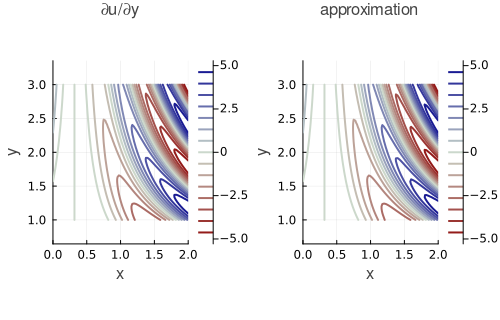

In [4]:
M = maximum(abs, ∂yU)    # find the range of the result
plot(layout=(1, 2), 
    aspect_ratio=1,   clims=(-M, M), 
    xlabel="x", ylabel="y")
contour!(x, y, mtx(∂u_∂y, x, y)';
    levels=15,  subplot=1,
    color=:redsblues,
    title="∂u/∂y")
contour!(x, y, ∂yU';
    levels=15,  subplot=2,
    color=:redsblues, 
    title="approximation")

To the eye there is little difference to be seen, though the results have no more than a few correct digits at these discretization sizes:

In [5]:
exact = mtx(∂u_∂y, x, y)
# Relative difference in Frobenius norm:
norm(exact - ∂yU) / norm(exact)

0.0035544848411698123